In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier


In [2]:
with open('./admission.txt', 'r') as f:
    reader = csv.reader(f)
    X = []
    y = []
    for row in reader:
        x1, x2, lbl = float(row[0]), float(row[1]), float(row[2])
        X.append([x1, x2])
        y.append(lbl)
X = np.array(X)
y = np.array(y)
 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

In [3]:
def classify(X, y, example, k):
    '''
    :param X: zbiór (uczący) danych postaci ndarray (m, n), gdzie m to liczba przykładów, a n liczba cech
    :param y: zbiór wartości (labels) w postaci wektora ndarray (m, ). Każdy z elementów ma wartość 0 lub 1
    :param example: wektor cech danego przykładu postaci ndarray (n, )
    :param k: parametr k algorytmu knn
    :return: predykcja klasy przykładu. 0 lub 1
    '''
    

    
    distances = np.sqrt(((X - example) ** 2).sum(axis=1))
    distance_label_pairs = list(zip(distances, y))
    
    sorted_pairs = sorted(distance_label_pairs, key=lambda x: x[0])
    
    nearest_neighbors = sorted_pairs[:k]
    
    prediction = round(sum(label for _, label in nearest_neighbors) / k)
    
    return prediction
    

In [4]:
for k in [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]:
    y_pred = np.zeros(y_test.shape)
    for example_idx, example in enumerate(x_test):
        pred = classify(x_train, y_train, example, k)
        y_pred[example_idx] = pred
        
print(y_pred)

[1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 0. 0.]


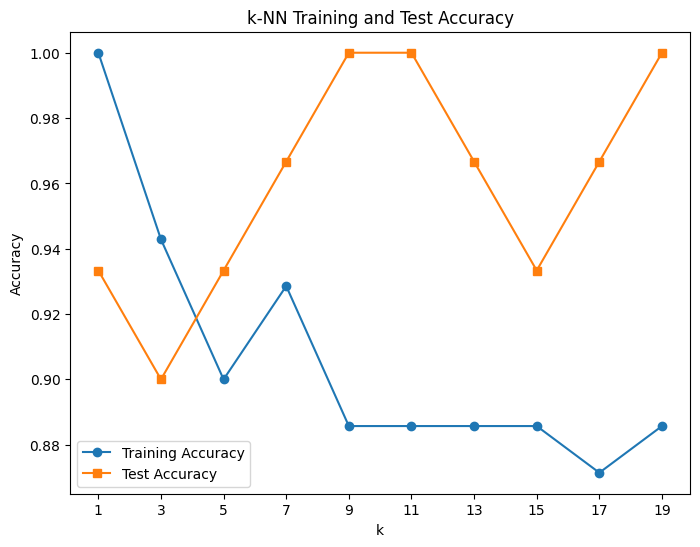

In [5]:
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
train_accuracies = []
test_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    
    # Calculate training accuracy
    train_accuracy = knn.score(x_train, y_train)
    train_accuracies.append(train_accuracy)
    
    # Calculate test accuracy
    test_accuracy = knn.score(x_test, y_test)
    test_accuracies.append(test_accuracy)
    
plt.figure(figsize=(8, 6))
plt.plot(k_values, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(k_values, test_accuracies, label='Test Accuracy', marker='s')
plt.xticks(k_values)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k-NN Training and Test Accuracy')
plt.legend()
# plt.grid(True)
plt.show()

In [6]:
def plot_k(k):
    plt.figure(figsize=(5, 5))
    plt.title(f'k={k}')
    plt.xlabel('x1')
    plt.ylabel('x2')
    
    # prepare data for contour plot
    x1_res = 50
    x2_res = 50
    x1 = np.linspace(x_train[:, 0].min(), x_train[:, 0].max(), x1_res)
    x2 = np.linspace(x_train[:, 1].min(), x_train[:, 1].max(), x2_res)
    x1x1, x2x2 = np.meshgrid(x1, x2)
    x1x2_range_comb = np.c_[x1x1.ravel(), x2x2.ravel()]
    labels_space = np.zeros((x1_res, x2_res))
    for row_idx in range(x2_res):
       for col_idx in range(x1_res):
           example = np.array([x1[col_idx], x2[row_idx]])
           pred = classify(x_train, y_train, example, k)
           labels_space[row_idx, col_idx] = pred
    # plot decision boundary
    plt.contour(x1x1, x2x2, labels_space, levels=[0.5], colors='g')
    
    # plot training set
    plt.plot(x_train[y_train == 0, 0], x_train[y_train == 0, 1], 'bo')
    plt.plot(x_train[y_train == 1, 0], x_train[y_train == 1, 1], 'rx')
    
    # plot test set
    plt.plot(x_test[y_test == 0, 0], x_test[y_test == 0, 1], 'b.')
    plt.plot(x_test[y_test == 1, 0], x_test[y_test == 1, 1], 'r*')
    
    plt.legend(['train_0', 'train_1', 'test_0', 'test_1'])

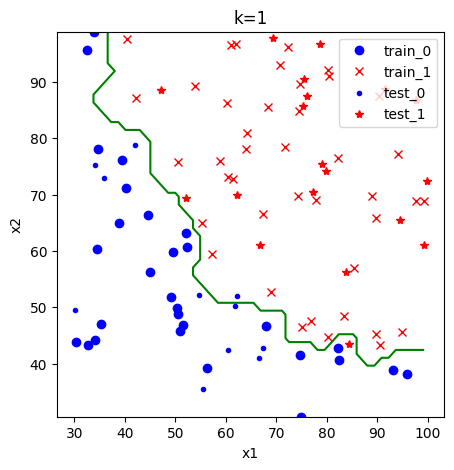

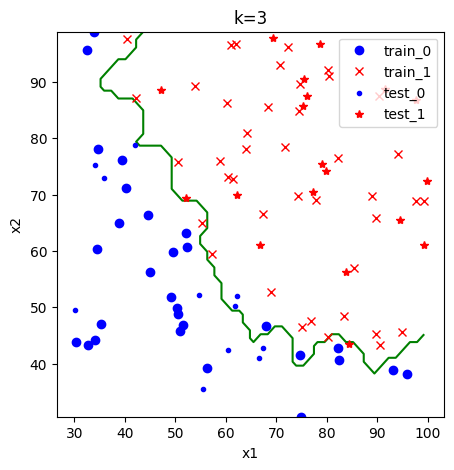

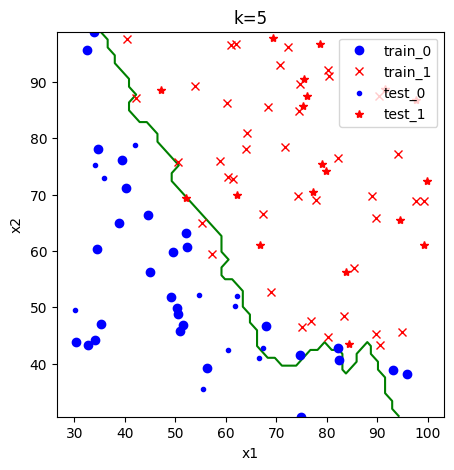

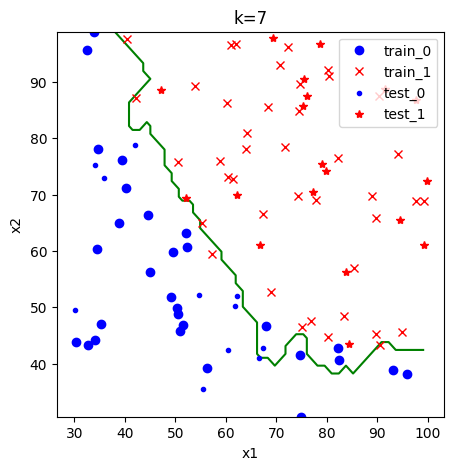

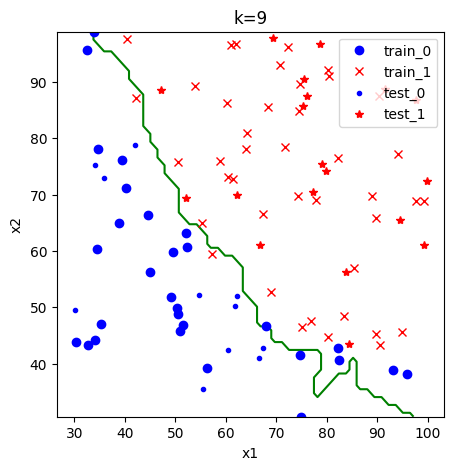

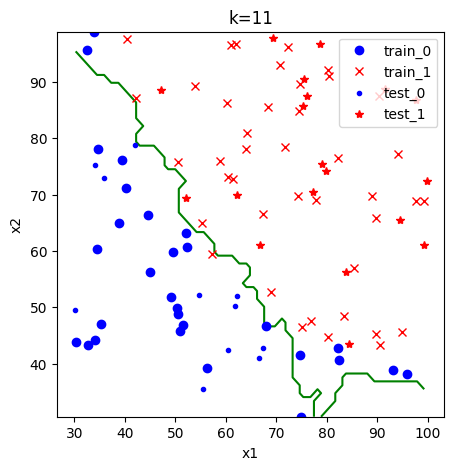

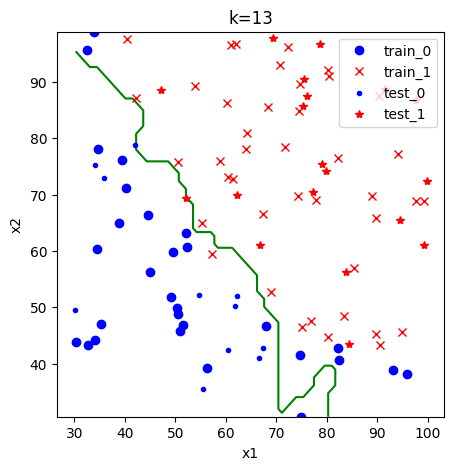

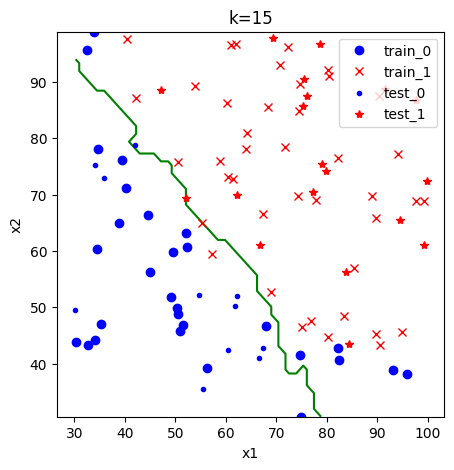

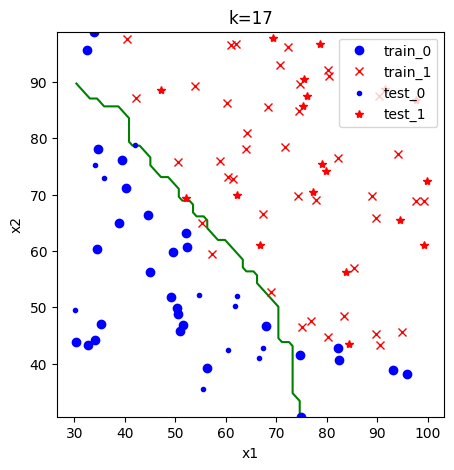

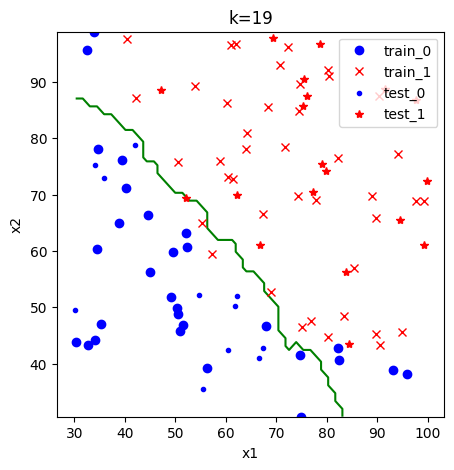

In [7]:
for i in [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]:
    plot_k(i)

In [8]:
from sklearn.datasets import load_digits
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

data = load_digits()
X = data['data']
y = data['target']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
best_k = 0
best_accuracy = 0
best_confusion_matrix = None
best_classification_report = None

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(x_train, y_train)
    y_pred = knn_classifier.predict(x_test)


    accuracy = np.mean(y_pred == y_test)
    print(f"Accuracy for k={k}: {accuracy}")


    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy
        best_confusion_matrix = confusion_matrix(y_test, y_pred)
        best_classification_report = classification_report(y_test, y_pred)

print(f"Best k: {best_k} with accuracy: {best_accuracy}")
print("Confusion Matrix:")
print(best_confusion_matrix)
print("Classification Report:")
print(best_classification_report)



Accuracy for k=1: 0.9822222222222222
Accuracy for k=3: 0.9866666666666667
Accuracy for k=5: 0.9933333333333333
Accuracy for k=7: 0.9933333333333333
Accuracy for k=9: 0.9866666666666667
Accuracy for k=11: 0.98
Accuracy for k=13: 0.98
Accuracy for k=15: 0.98
Accuracy for k=17: 0.98
Accuracy for k=19: 0.9777777777777777
Best k: 5 with accuracy: 0.9933333333333333
Confusion Matrix:
[[43  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 46  0  0  0  0  0  0]
 [ 0  0  0  0 55  0  0  0  0  0]
 [ 0  0  0  0  0 58  0  0  0  1]
 [ 0  0  0  0  0  0 45  0  0  0]
 [ 0  0  0  0  0  0  0 41  0  0]
 [ 0  0  0  0  0  0  0  0 38  0]
 [ 0  0  0  0  1  1  0  0  0 46]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        38
           3       1.00      1.00      1.00     

## Drzewa decyzyjne

In [9]:
with open('./admission.txt', 'r') as f:
    reader = csv.reader(f)
    X = []
    y = []
    for row in reader:
        x1, x2, lbl = float(row[0]), float(row[1]), float(row[2])
        X.append([x1, x2])
        y.append(lbl)
X = np.array(X)
y = np.array(y)
 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

for lvl in [1,2,3,4,5]:
    decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=lvl)
    decision_tree.fit(x_train, y_train)
     
    y_pred = decision_tree.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    y_pred_train = decision_tree.predict(x_train)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    
    print(f"level: {lvl}, test acc: {accuracy}, train acc: {train_accuracy}")

level: 1, test acc: 0.7, train acc: 0.8428571428571429
level: 2, test acc: 0.8333333333333334, train acc: 0.9428571428571428
level: 3, test acc: 0.8333333333333334, train acc: 0.9857142857142858
level: 4, test acc: 0.8333333333333334, train acc: 1.0
level: 5, test acc: 0.8333333333333334, train acc: 1.0


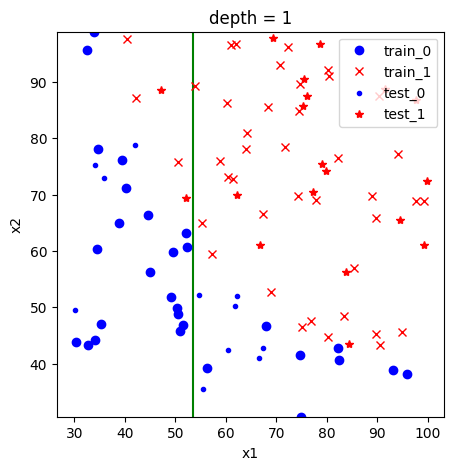

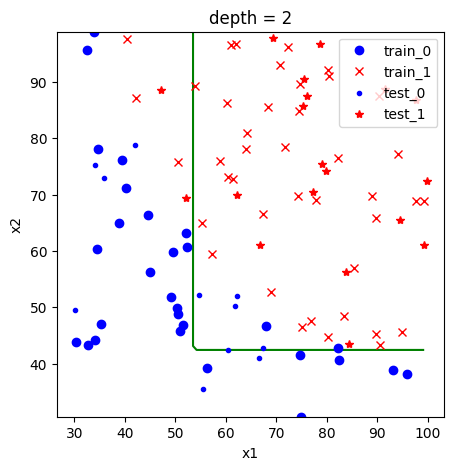

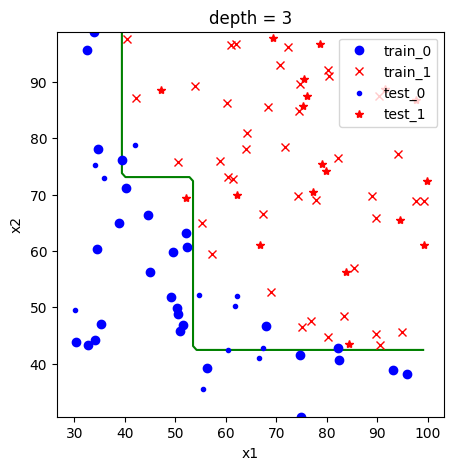

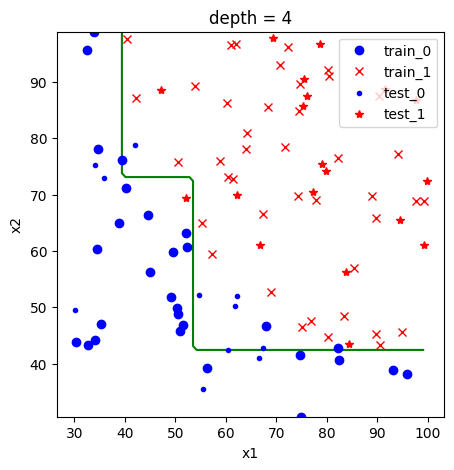

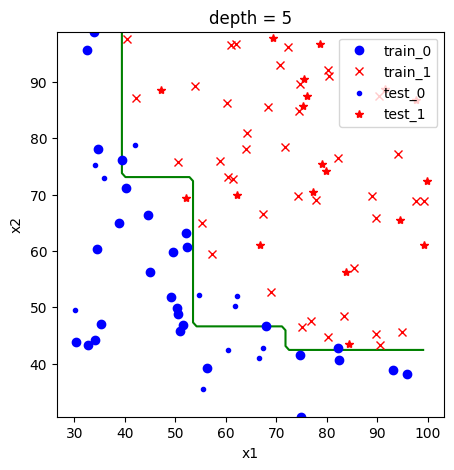

In [10]:
for lvl in [1,2,3,4,5]:

    plt.figure(figsize=(5, 5))
    plt.title(f'depth = {lvl}')
    plt.xlabel('x1')
    plt.ylabel('x2')

    
    x1_res = 50
    x2_res = 50
    x1 = np.linspace(x_train[:, 0].min(), x_train[:, 0].max(), x1_res)
    x2 = np.linspace(x_train[:, 1].min(), x_train[:, 1].max(), x2_res)
    x1x1, x2x2 = np.meshgrid(x1, x2)
    x1x2_range_comb = np.c_[x1x1.ravel(), x2x2.ravel()]
    labels_space = np.zeros((x1_res, x2_res))
    decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=lvl)
    decision_tree.fit(x_train, y_train)
    y_pred = decision_tree.predict(np.c_[x1x1.ravel(), x2x2.ravel()])
    y_pred = y_pred.reshape(x1x1.shape)
    
    
    plt.contour(x1x1, x2x2, y_pred, levels=[0.5], colors='g')
    
    # plot training set
    plt.plot(x_train[y_train == 0, 0], x_train[y_train == 0, 1], 'bo')
    plt.plot(x_train[y_train == 1, 0], x_train[y_train == 1, 1], 'rx')
    
    # plot test set
    plt.plot(x_test[y_test == 0, 0], x_test[y_test == 0, 1], 'b.')
    plt.plot(x_test[y_test == 1, 0], x_test[y_test == 1, 1], 'r*')
    
    plt.legend(['train_0', 'train_1', 'test_0', 'test_1'])
    plt.show()

## Własna implementacja algorytmu generowania drzew decyzyjnych (zadanie dodatkowe)


In [11]:
def calculate_entropy(p):
    if p == 0 or p == 1:
        return 0
    else:
        return -p * np.log2(p) - (1 - p) * (np.log2(1 - p))

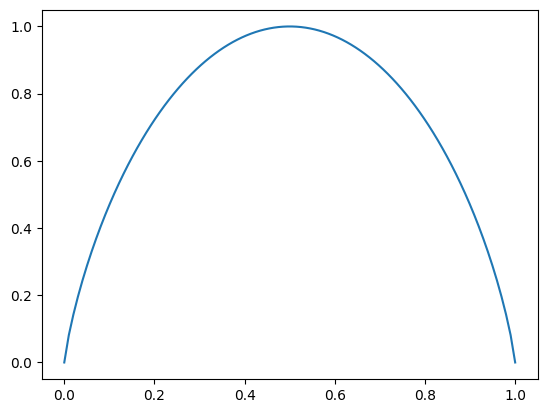

In [12]:
p = np.linspace(0,1, 100)
points = [calculate_entropy(p) for p in p]
plt.plot(p,points)
plt.show()